In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
import warnings
import sys
import sklearn
from tqdm import tqdm
import itertools
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline

from imblearn.over_sampling import ADASYN
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from scipy.stats import skew, kurtosis
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from pathlib import Path
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import catboost
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import ExtraTreesClassifier

warnings.filterwarnings('ignore')

C:\python\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df1 = pd.read_csv('TM_meta_fin.csv')

In [3]:
df1.columns

Index(['연령', '직업군', '결혼여부', '학력', '신용카드소지여부', '주택대출여부', '개인대출여부', 'contact',
       '통화시간', '연락시도횟수', '과거통화횟수', '계약여부', '연락일', '요일', '주말여부', '경제활동여부',
       '연령대', '년', '월', '일', 'Card_ID', '분류', '혜택분야', '소개', '연회비', '카드명',
       '연회비금액', '연회비범주', 'plcc'],
      dtype='object')

In [4]:
df1['Target'] = df1['계약여부'].replace('no',1).replace('yes',0)
df1['Target'].value_counts()

1    36548
0     4640
Name: Target, dtype: int64

In [5]:
X = df1[['연령', '결혼여부', '학력', '신용카드소지여부', 
         '주택대출여부', '개인대출여부', '통화시간', '연락시도횟수', '과거통화횟수',
          '요일','경제활동여부','월','연회비금액','plcc']]
Y = df1['Target']

In [6]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, random_state=1234)

In [7]:
# Separate Numeric and Categorical 
numeric_list  = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()

In [8]:
# Numeric Data
numeric_pipe  = make_pipeline( SimpleImputer(strategy='median'), 
                              MinMaxScaler() )
# Categorical Data
category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent'),
                               OneHotEncoder(handle_unknown='ignore') )

In [ ]:
# Other Option
# from imblearn.pipeline import Pipeline, make_pipeline
# model = Pipeline( [ ('scaler', MinMaxScaler()),
#                    ('model', ExtraTreesClassifier() ) ] )
# model.fit(train_x, train_y)

# Preprocessing + oversampling(ADASYN) + Modeling(GridSearch)

## ExtraTrees

In [10]:
# Preprocessing both Numeric and Categorical Features
preprocessing_pipe = make_column_transformer( (numeric_pipe, numeric_list), 
                                              (category_pipe, category_list) )
# Preprocessing + oversampling(ADASYN) + Modeling
from sklearn.ensemble import ExtraTreesClassifier

pipe_model = make_pipeline( preprocessing_pipe, 
                            ADASYN(), 
                            ExtraTreesClassifier() )

In [ ]:
# Check Parameters
et_ex = ExtraTreesClassifier()
et_ex.get_params().keys()

In [ ]:
# CV(Cross-Validation) 
# Parameter Tuning
param_grid = {'extratreesclassifier__criterion' : ['gini', 'entropy', 'log_loss'], 
              'extratreesclassifier__max_depth' : [depth for depth in range(1, 11)],
              'extratreesclassifier__min_samples_split' : [n_split * 10 for n_split in range(1, 11)],
              'extratreesclassifier__min_samples_leaf':[n_leaf * 2 for n_leaf in range(1, 11)],
              'extratreesclassifier__max_features' : ['sqrt', 'log2', None]}

grid_model = GridSearchCV(pipe_model, param_grid = param_grid ,
                          cv=5 , n_jobs=-1, scoring='f1', verbose = True)
grid_model.fit(X_train, Y_train)

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


In [13]:

# CV(Cross-Validation) 
# Parameter Tuning
param_grid = {'extratreesclassifier__criterion' : ['gini', 'entropy', 'log_loss'], 
              'extratreesclassifier__max_depth' : [depth for depth in range(1, 11)],
              'extratreesclassifier__min_samples_split' : [n_split * 10 for n_split in range(1, 11)],
              'extratreesclassifier__min_samples_leaf':[n_leaf * 2 for n_leaf in range(1, 11)],
              'extratreesclassifier__max_features' : ['sqrt', 'log2', None]}

grid_model = GridSearchCV(pipe_model, param_grid = param_grid ,
                          cv=5 , n_jobs=-1, scoring='f1', verbose = True)
grid_model.fit(X_train, Y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['연령',
                                                                          '통화시간',
                                                                          '연락시도횟수',
                                                                          '과거통화횟수',
                                                                          '월',
                                                                          '연회비금액',
                                                                          'plcc']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')...
                                        ExtraTreesClassifier())]),
             n_jobs=-1,
             param_grid={'extratreesclassifier__criterion': ['gini'],
                         'extratreesclassifier__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                         'extratreesclassifier__max_features': ['sqrt', 'log2'],
                         'extratreesclassifier__min_samples_leaf': [2, 4, 6, 8,
                                                                    10, 12, 14,
                                                                    16, 18,
                                                                    20],
                         'extratreesclassifier__min_samples_split': [10, 20, 30,
                                                                     40, 50, 60,
                                                                     70, 80, 90,
                                                                     100]},
             scoring='f1', verbose=True)

In [14]:
print("best estimator model: \n{}".format(grid_model.best_estimator_))
print("\nbest parameter: \n{}".format(grid_model.best_params_))
print("\nbest score: \n{}".format(grid_model.best_score_.round(4)))


best estimator model: 
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['연령', '통화시간', '연락시도횟수',
                                                   '과거통화횟수', '월', '연회비금액',
                                                   'plcc']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                    

## RandomForest

In [ ]:
# Preprocessing both Numeric and Categorical Features
preprocessing_pipe = make_column_transformer( (numeric_pipe, numeric_list), 
                                              (category_pipe, category_list) )
# Preprocessing + oversampling(ADASYN) + Modeling
from sklearn.ensemble import RandomForestClassifier

pipe_model = make_pipeline( preprocessing_pipe, 
                            ADASYN(), 
                            RandomForestClassifier() )

In [ ]:
# Check Parameters
rf_ex = RandomForestClassifier()
rf_ex.get_params().keys()

In [ ]:
# 교차검증 및 매개변수 튜닝
param_grid = {'randomforestclassifier__criterion' : ['gini', 'entropy', 'log_loss'], 
              'randomforestclassifier__max_depth' : [depth for depth in range(1, 11)],
              'randomforestclassifier__min_samples_split' : [n_split * 10 for n_split in range(1, 11)],
              'randomforestclassifier__min_samples_leaf':[n_leaf * 2 for n_leaf in range(1, 11)],
              'randomforestsclassifier__max_features' : ['sqrt', 'log2', None]}

grid_model = GridSearchCV(pipe_model, param_grid = param_grid ,
                          cv=5 , n_jobs=-1, scoring='f1')
grid_model.fit(X_train, Y_train)

In [ ]:
print("best estimator model: \n{}".format(grid_model.best_estimator_))
print("\nbest parameter: \n{}".format(grid_model.best_params_))
print("\nbest score: \n{}".format(grid_model.best_score_.round(4)))

## XGBoost

In [9]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# 숫자와 문자가 동시에 처리되도록 
from xgboost import XGBClassifier
preprocessing_pipe = make_column_transformer( (numeric_pipe, numeric_list), 
                                              (category_pipe, category_list) )
# 타입별 전처리 + PCA + oversampling + 학습 
# from sklearn.ensemble import XGBClassifier

pipe_model = make_pipeline( preprocessing_pipe, 
                            ADASYN(), 
                            XGBClassifier() )

In [ ]:
xgb = XGBClassifier()
xgb.get_params().keys()

In [11]:
# 교차검증 및 매개변수 튜닝 (xgb)
param_grid = {'xgbclassifier__learning_rate': [lr * 0.1 for lr in range(1, 9)], 
              'xgbclassifier__max_depth': [depth for depth in range(1, 11)],
              'xgbclassifier__min_child_weight': [i for i in range(1, 11)],
              'xgbclassifier__n_estimators': [100, 150] }      #number of trees, change it to 1000 for better results
              
# param_grid = {'xgbclassifier__learning_rate' : [0.1],
#               'xgbclassifier__max_depth' : [8], 'xgbclassifier__min_child_weight' : [10], 'xgbclassifier__n_estimators' : [110]}


grid_model = GridSearchCV(pipe_model, param_grid = param_grid, cv=5 , n_jobs=-1, scoring='f1', verbose = True)
grid_model.fit(X_train, Y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['연령',
                                                                          '통화시간',
                                                                          '연락시도횟수',
                                                                          '과거통화횟수',
                                                                          '월',
                                                                          '연회비금액',
                                                                          'plcc']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')...
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5,
                                                          0.6000000000000001,
                                                          0.7000000000000001,
                                                          0.8],
                         'xgbclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                         'xgbclassifier__min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                         'xgbclassifier__n_estimators': [100, 150]},
             scoring='f1', verbose=True)

In [12]:
print("best estimator model: \n{}".format(grid_model.best_estimator_))
print("\nbest parameter: \n{}".format(grid_model.best_params_))
print("\nbest score: \n{}".format(grid_model.best_score_.round(4)))

best estimator model: 
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['연령', '통화시간', '연락시도횟수',
                                                   '과거통화횟수', '월', '연회비금액',
                                                   'plcc']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                    

## CatBoost

In [ ]:
# 숫자와 문자가 동시에 처리되도록 
preprocessing_pipe = make_column_transformer( (numeric_pipe, numeric_list), 
                                              (category_pipe, category_list) )
# 타입별 전처리 + PCA + oversampling + 학습 
import catboost
from catboost import CatBoostClassifier, Pool

pipe_model = make_pipeline( preprocessing_pipe, 
                            ADASYN(), 
                            CatBoostClassifier() )

In [ ]:
# 교차검증 및 매개변수 튜닝
param_grid = {'catboostclassifier__iterations' : [700, 1000, 1500],
              'catboostclassifier__learning_rate' : [0.03, 0.05, 0.08, 0.1],
              'catboostclassifier__bootstrap_type':['Bayesian', 'MVS'],
             'catboostclassifier__min_data_in_leaf':[i for i in range(2, 9)],
              'catboostclassifier__auto_class_weights' : ['Balanced']}


grid_model = GridSearchCV(pipe_model, param_grid = param_grid ,
                          cv=5 , n_jobs=-1, scoring='f1', verbose=1)

grid_model.fit(X_train, Y_train)

print("best estimator model: \n{}".format(grid_model.best_estimator_))
print("\nbest parameter: \n{}".format(grid_model.best_params_))
print("\nbest score: \n{}".format(grid_model.best_score_.round(4)))

In [ ]:
print("best estimator model: \n{}".format(grid_model.best_estimator_))
print("\nbest parameter: \n{}".format(grid_model.best_params_))
print("\nbest score: \n{}".format(grid_model.best_score_.round(4)))

## LGBM

In [ ]:
# Preprocessing both Numeric and Categorical Features
preprocessing_pipe = make_column_transformer( (numeric_pipe, numeric_list), 
                                              (category_pipe, category_list) )
# Preprocessing + oversampling(ADASYN) + Modeling
from lightgbm import LGBClassifier

pipe_model = make_pipeline( preprocessing_pipe, 
                            ADASYN(), 
                            LGBClassifier() )

In [ ]:
# Check Parameters
lgbm_ex = LGBMClassifier()
lgbm_ex.get_params().keys()

In [ ]:
# 교차검증 및 매개변수 튜닝
param_grid = {'lgbmclassifier__criterion' : ['gini', 'entropy', 'log_loss'], 
              'lgbmclassifier__learning_rate' : [lr * 0.1 for lr in range(1,11)],
              'lgbmclassifier__n_estimators' : [n * 10 for n in range(5, 21)],
              'lgbmclassifier__num_leaves' : [ i for i in range(20, 120, 20)],
              'lgbmclassifier__min_child_samples' : [i for i in range(5, 20, 5)],
              'lgbmclassifier__reg_alpha' : [i * 0.01 for i in range(0, 6)]}

grid_model = GridSearchCV(pipe_model, param_grid = param_grid ,
                          cv=5 , n_jobs=-1, scoring='f1', verbose = True)
grid_model.fit(X_train, Y_train)

In [ ]:
print("best estimator model: \n{}".format(grid_model.best_estimator_))
print("\nbest parameter: \n{}".format(grid_model.best_params_))
print("\nbest score: \n{}".format(grid_model.best_score_.round(4)))

# Final Modeling

In [24]:
# CLassification Models
model = ["ExtraTrees", "RandomForest", "XGBoost", "CatBoost", "LGBM"] 

# Append Accuracy 
train_accuracy = []
test_accuracy = [] 

# auc score 
model_auc = []

# Precision, Recall score 
model_precision = []
model_recall = [] 

# f1 score  
model_f1_score = []

#### ExtraTrees

In [25]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

pipe_model_et = make_pipeline(preprocessing_pipe, 
                                 ADASYN(), 
                                 ExtraTreesClassifier(random_state = 1234,
                                                      criterion = 'entropy',
                                                      max_depth = 10,
                                                      max_features = None,
                                                      min_samples_leaf = 6,
                                                      min_samples_split = 40
                                                    ))

pipe_model_et.fit(X_train, Y_train)
y_pred = pipe_model_et.predict(X_test) 

print('Accuracy on training Set : {:.4f}'.format(pipe_model_et.score(X_train, Y_train)))

# train 정확도
train_accuracy.append(pipe_model_et.score(X_train, Y_train))

print('Accuracy on test Set : {:.4f}'.format(pipe_model_et.score(X_test, Y_test)))

# test 정확도
test_accuracy.append(pipe_model_et.score(X_test, Y_test))

# confusion matrix
print('Confusion Matrix : \n {}'.format(confusion_matrix(Y_test, y_pred)))

# 목표변수의 불균형 : f1score로 모델 평가
print(classification_report(Y_test, y_pred, digits = 4))

Accuracy on training Set : 0.8197
Accuracy on test Set : 0.8153
Confusion Matrix : 
 [[ 943  238]
 [1664 7452]]
              precision    recall  f1-score   support

           0     0.3617    0.7985    0.4979      1181
           1     0.9691    0.8175    0.8868      9116

    accuracy                         0.8153     10297
   macro avg     0.6654    0.8080    0.6924     10297
weighted avg     0.8994    0.8153    0.8422     10297



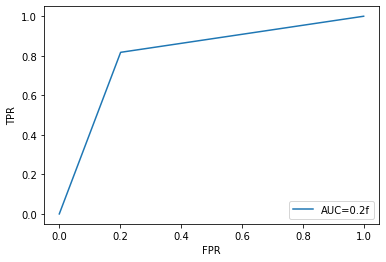

In [27]:
#모델 성능 평가: precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc
# roc curve 그리기, label에 auc표시(소수점 2자리)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# save auc 
model_auc.append(roc_auc)

plt.plot(fpr, tpr, label ="AUC=0.2f"% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [28]:
#precision, recall score
model_precision.append(precision_score(Y_test,y_pred))
model_recall.append(recall_score(Y_test, y_pred))

#f1 score
model_f1_score.append(f1_score(Y_test, y_pred))

#### RandomForest

In [29]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

pipe_model_rf = make_pipeline(preprocessing_pipe, 
                                 ADASYN(), 
                                 RandomForestClassifier(random_state = 1234,
                                                    criterion = 'entropy',
                                                    max_depth = 10, 
                                                    max_features = None,
                                                    min_samples_leaf = 6,
                                                    min_samples_split = 40))
pipe_model_rf.fit(X_train, Y_train)
y_pred = pipe_model_rf.predict(X_test) 

print('Accuracy on training Set : {:.4f}'.format(pipe_model_rf.score(X_train, Y_train)))

# train 정확도
train_accuracy.append(pipe_model_rf.score(X_train, Y_train))

print('Accuracy on test Set : {:.4f}'.format(pipe_model_rf.score(X_test, Y_test)))

# test 정확도
test_accuracy.append(pipe_model_rf.score(X_test, Y_test))

# confusion matrix
print('Confusion Matrix : \n {}'.format(confusion_matrix(Y_test, y_pred)))

# 목표변수의 불균형 : f1score로 모델 평가
print(classification_report(Y_test, y_pred, digits = 4))

Accuracy on training Set : 0.8557
Accuracy on test Set : 0.8380
Confusion Matrix : 
 [[ 798  383]
 [1285 7831]]
              precision    recall  f1-score   support

           0     0.3831    0.6757    0.4890      1181
           1     0.9534    0.8590    0.9038      9116

    accuracy                         0.8380     10297
   macro avg     0.6682    0.7674    0.6964     10297
weighted avg     0.8880    0.8380    0.8562     10297



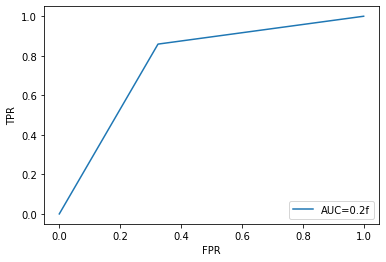

In [30]:
#모델 성능 평가: precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc
# roc curve 그리기, label에 auc표시(소수점 2자리)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# save auc 
model_auc.append(roc_auc)

plt.plot(fpr, tpr, label ="AUC=0.2f"% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [31]:
#precision, recall score
model_precision.append(precision_score(Y_test,y_pred))
model_recall.append(recall_score(Y_test, y_pred))

#f1 score
model_f1_score.append(f1_score(Y_test, y_pred))

#### XGBoost

In [32]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

pipe_model_xg = make_pipeline(preprocessing_pipe, 
                                 ADASYN(), 
                                 XGBClassifier(random_state = 1234, learning_rate = 0.1, max_depth = 8, 
                                               min_child_weight = 10, n_estimators = 110))

pipe_model_xg.fit(X_train, Y_train)
y_pred = pipe_model_xg.predict(X_test) 

print('Accuracy on training Set : {:.4f}'.format(pipe_model_xg.score(X_train, Y_train)))

# train 정확도
train_accuracy.append(pipe_model_xg.score(X_train, Y_train))


print('Accuracy on test Set : {:.4f}'.format(pipe_model_xg.score(X_test, Y_test)))

# test 정확도
test_accuracy.append(pipe_model_xg.score(X_test, Y_test))

# confusion matrix
print('Confusion Matrix : \n {}'.format(confusion_matrix(Y_test, y_pred)))

# 목표변수의 불균형 : f1score로 모델 평가
print(classification_report(Y_test, y_pred, digits = 4))

Accuracy on training Set : 0.9219
Accuracy on test Set : 0.8939
Confusion Matrix : 
 [[ 472  709]
 [ 384 8732]]
              precision    recall  f1-score   support

           0     0.5514    0.3997    0.4634      1181
           1     0.9249    0.9579    0.9411      9116

    accuracy                         0.8939     10297
   macro avg     0.7382    0.6788    0.7023     10297
weighted avg     0.8821    0.8939    0.8863     10297



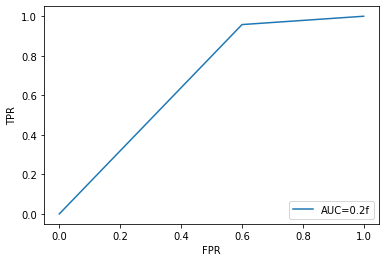

In [33]:
#모델 성능 평가: precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc
# roc curve 그리기, label에 auc표시(소수점 2자리)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# save auc 
model_auc.append(roc_auc)

plt.plot(fpr, tpr, label ="AUC=0.2f"% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [34]:
#precision, recall score
model_precision.append(precision_score(Y_test,y_pred))
model_recall.append(recall_score(Y_test, y_pred))

#f1 score
model_f1_score.append(f1_score(Y_test, y_pred))

#### CatBoost

In [35]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

pipe_model_cb = make_pipeline(preprocessing_pipe, 
                                 ADASYN(), 
                                 CatBoostClassifier(random_state = 1234,
                                                    auto_class_weights = 'Balanced',
                                                    bootstrap_type = 'MVS', 
                                                    iterations = 1000, 
                                                    learning_rate = 0.05,
                                                    min_data_in_leaf = 6 ))
pipe_model_cb.fit(X_train, Y_train)
y_pred = pipe_model_cb.predict(X_test) 

print('Accuracy on training Set : {:.4f}'.format(pipe_model_cb.score(X_train, Y_train)))

# train 정확도
train_accuracy.append(pipe_model_cb.score(X_train, Y_train))

print('Accuracy on test Set : {:.4f}'.format(pipe_model_cb.score(X_test, Y_test)))

# test 정확도
test_accuracy.append(pipe_model_cb.score(X_test, Y_test))

# confusion matrix
print('Confusion Matrix : \n {}'.format(confusion_matrix(Y_test, y_pred)))

# 목표변수의 불균형 : f1score로 모델 평가
print(classification_report(Y_test, y_pred, digits = 4))

0:	learn: 0.6426332	total: 164ms	remaining: 2m 43s
1:	learn: 0.6094437	total: 179ms	remaining: 1m 29s
2:	learn: 0.5811161	total: 191ms	remaining: 1m 3s
3:	learn: 0.5475557	total: 202ms	remaining: 50.3s
4:	learn: 0.5287457	total: 212ms	remaining: 42.3s
5:	learn: 0.5098742	total: 224ms	remaining: 37.1s
6:	learn: 0.4956025	total: 234ms	remaining: 33.2s
7:	learn: 0.4774603	total: 245ms	remaining: 30.3s
8:	learn: 0.4655390	total: 256ms	remaining: 28.2s
9:	learn: 0.4544746	total: 267ms	remaining: 26.4s
10:	learn: 0.4414522	total: 278ms	remaining: 25s
11:	learn: 0.4334823	total: 289ms	remaining: 23.8s
12:	learn: 0.4247909	total: 300ms	remaining: 22.8s
13:	learn: 0.4046618	total: 327ms	remaining: 23s
14:	learn: 0.3993707	total: 340ms	remaining: 22.3s
15:	learn: 0.3923239	total: 353ms	remaining: 21.7s
16:	learn: 0.3816705	total: 364ms	remaining: 21s
17:	learn: 0.3739130	total: 375ms	remaining: 20.4s
18:	learn: 0.3693633	total: 392ms	remaining: 20.3s
19:	learn: 0.3654587	total: 406ms	remaining: 

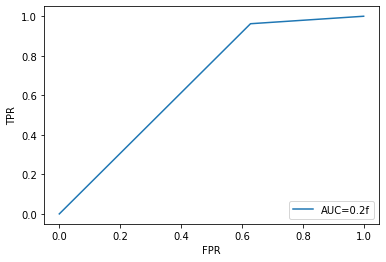

In [36]:
#모델 성능 평가: precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc
# roc curve 그리기, label에 auc표시(소수점 2자리)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# save auc 
model_auc.append(roc_auc)

plt.plot(fpr, tpr, label ="AUC=0.2f"% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [37]:
#precision, recall score
model_precision.append(precision_score(Y_test,y_pred))
model_recall.append(recall_score(Y_test, y_pred))

#f1 score
model_f1_score.append(f1_score(Y_test, y_pred))

#### LGBM

In [38]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

pipe_model_lg = make_pipeline(preprocessing_pipe, 
                                 ADASYN(), 
                                 LGBMClassifier(random_state = 1234,
                                               learning_rate = 0.1, 
                                               min_child_samples = 5, 
                                               n_estimators = 110, 
                                               num_leaves = 60, 
                                               reg_alpha = 0.05))
pipe_model_lg.fit(X_train, Y_train)
y_pred = pipe_model_lg.predict(X_test) 

print('Accuracy on training Set : {:.4f}'.format(pipe_model_lg.score(X_train, Y_train)))

# train 정확도
train_accuracy.append(pipe_model_lg.score(X_train, Y_train))

print('Accuracy on test Set : {:.4f}'.format(pipe_model_lg.score(X_test, Y_test)))

# test 정확도
test_accuracy.append(pipe_model_lg.score(X_test, Y_test))

# confusion matrix
print('Confusion Matrix : \n {}'.format(confusion_matrix(Y_test, y_pred)))

# 목표변수의 불균형 : f1score로 모델 평가
print(classification_report(Y_test, y_pred, digits = 4))

Accuracy on training Set : 0.9299
Accuracy on test Set : 0.8946
Confusion Matrix : 
 [[ 468  713]
 [ 372 8744]]
              precision    recall  f1-score   support

           0     0.5571    0.3963    0.4631      1181
           1     0.9246    0.9592    0.9416      9116

    accuracy                         0.8946     10297
   macro avg     0.7409    0.6777    0.7024     10297
weighted avg     0.8825    0.8946    0.8867     10297



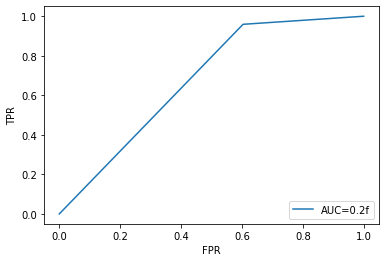

In [39]:
#모델 성능 평가: precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc
# roc curve 그리기, label에 auc표시(소수점 2자리)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# save auc 
model_auc.append(roc_auc)

plt.plot(fpr, tpr, label ="AUC=0.2f"% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [40]:
#precision, recall score
model_precision.append(precision_score(Y_test,y_pred))
model_recall.append(recall_score(Y_test, y_pred))

#f1 score
model_f1_score.append(f1_score(Y_test, y_pred))

In [41]:
#모델별 평가 결과
df_eval = pd.DataFrame(index=model)
df_eval["TrainAccuracy"] = train_accuracy 
df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc
df_eval["Precision"] = model_precision;
df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score
df_eval.round(4)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
ExtraTrees,0.8197,0.8153,0.8080,0.9691,0.8175,0.8868
RandomForest,0.8557,0.8380,0.7674,0.9534,0.8590,0.9038
XGBoost,0.9219,0.8939,0.6788,0.9249,0.9579,0.9411
CatBoost,0.9340,0.8944,0.6669,0.9220,0.9622,0.9417
LGBM,0.9299,0.8946,0.6777,0.9246,0.9592,0.9416


# STACKING

In [ ]:
# 개별 모델 정의
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
ab_clf = AdaBoostClassifier()
dt_clf = DecisionTreeClassifier()
# 최종 메타 모델 정의
lr_final = LogisticRegression(C=10)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore')

def get_stacking_datasets(model, x_train_n, y_train_n, x_test_n, n_folds):
    # CV하기 위해 K-fold 설정
    kf = KFold(n_splits=n_folds, shuffle=False)
    
    # 최종 메타 모델이 사용할 학습 데이터 반환을 위해서 넘파이 배열을 0으로 만들어서 초기화
    train_fold_pred = np.zeros((x_train_n.shape[0], 1)) # 2차원으로
    test_pred = np.zeros((x_test_n.shape[0], n_folds))
    print(model.__class__.__name__, '모델 시작')
    
    for folder_counter, (train_idx, valid_idx) in enumerate(kf.split(x_train_n)):
        # 개별 모델 내부에서 학습하고 1개의 fold로 예측할 데이터 셋 추출
        print(f" Fold 횟수 : {folder_counter+1}")
        x_tr = x_train_n[train_idx]
        y_tr = y_train_n[train_idx]
        x_te = x_train_n[valid_idx]
        
        # 개별 모델이 학습한 후 1개의 fold데이터셋으로 예측값 반환 후 최종 메타모델이 학습할 데이터셋에 첨가
        model.fit(x_tr, y_tr)
        train_fold_pred[valid_idx, :] = model.predict(x_te).reshape(-1,1)
        # 개별 모델이 원본 데이터셋의 검증 데이터셋을 기반으로 예측 결과값 반환 후 최종 메타모델이 검증할 데이터셋에 첨가
        test_pred[:, folder_counter] = model.predict(x_test_n)
    
    # 개별모델안에서 테스트 데이터셋을 기반으로 예측한 결과값들 mean취해주고 2차원으로 바꾸어주기
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean

knn_train, knn_test = get_stacking_datasets(knn_clf, x_train, y_train, x_test, 5)
rf_train, rf_test = get_stacking_datasets(rf_clf, x_train, y_train, x_test, 5)
ab_train, ab_test = get_stacking_datasets(ab_clf, x_train, y_train, x_test, 5)
dt_train, dt_test = get_stacking_datasets(dt_clf, x_train, y_train, x_test, 5)

## Feature Importances

In [43]:
df_importances= pd.DataFrame()
df_importances['Importance'] = pipe_model_lg['lgbmclassifier'].feature_importances_

total_list = numeric_list
encode_list = pipe_model_lg.named_steps['columntransformer'].named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names(input_features=category_list)
total_list.extend(encode_list)
df_importances['Columns'] = total_list

Text(0, 0.5, 'Features')

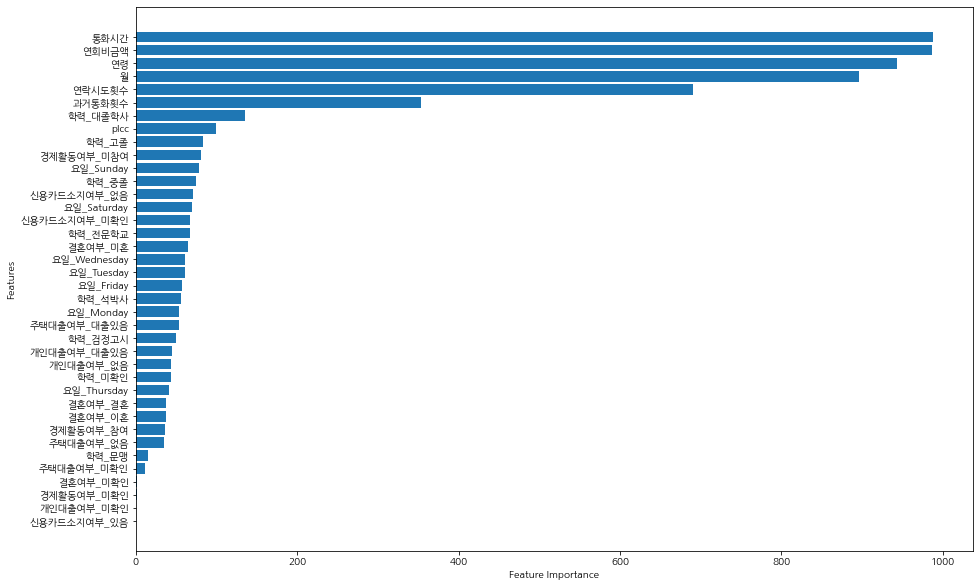

In [48]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importances.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importances))
plt.figure(figsize=(15, 10))
plt.barh(y=coordinates, width=df_importances["Importance"])
plt.yticks(coordinates, df_importances["Columns"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")

In [47]:
import matplotlib
matplotlib.rc('font', family = 'NanumGothic')


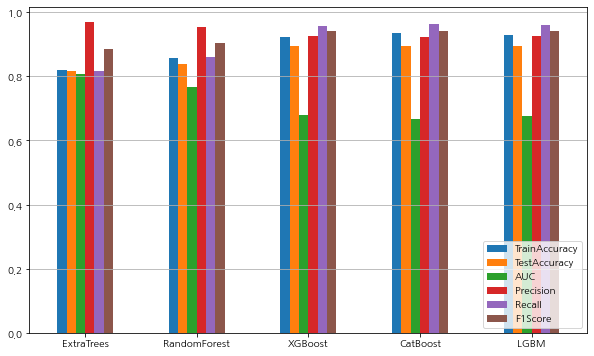

In [49]:
#모델별 평가 지표 확인
df_eval.plot.bar(rot=0,figsize=(10,6))
plt.legend(loc="lower right")
plt.grid(axis="y")